In [1]:
import os
import sys
import json
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import textacy
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
from tqdm import tqdm
from src.nlp_util.textacy_util import get_textacy_name_entities

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
article_sum = pd.read_csv("../data/csv_outputs/article_summary.csv")
# Turn the columns to string to avoid NaN errors
article_sum['headline'] = article_sum['headline'].astype('str')
article_sum['headline_extended'] = article_sum['headline_extended'].astype('str')
article_sum['summary'] = article_sum['summary'].astype('str')

In [4]:
article_sum.head()

,id,content_type,language,city,country,long_lat,title,headline,headline_extended,summary
0,f7ddc0430ebb40248f55b2cea715b889,text,en,NaN,NaN,NaN,US-Food-Column-ATK-Black-Bean-Burgers,Make a veggie burger that doesn't taste like a...,A veggie burger sounds good in theory. So why ...,nan
1,8e481a1459d04e2f82dbbb38b6d5ecb6,text,en,Stockton,United States,"[-121.29078, 37.9577]",US--High School-Censorship,California school newspaper will run story on ...,A Central California school district will allo...,A Central California school district will allo...
2,964285bee74e430cb22441e59a968e76,text,en,Avon,United States,"[-77.73411, 42.89547]",NY--911 Call-Probation,Sheriff: NY man calls 911 to say he's violatin...,Authorities say a western New York man has bee...,Authorities say a western New York man has bee...
3,5485474faec244b0881838c139b4ef10,text,en,New York,United States,"[-74.00597, 40.71427]",FBN--NFL Schedule,Champion Patriots open vs. Steelers; 5 interna...,The NFL's 100th season will begin with its mos...,The NFL's 100th season will begin with its mos...
4,8b7aa86208f24c51a687c2433817b59d,text,en,Washington,United States,"[-77.03637, 38.89511]",US--Trump-Russia Probe-Congress,Schiff hires staff with intelligence ties for ...,The House intelligence committee chairman has ...,The House intelligence committee chairman has ...


In [5]:
article_sum.shape

(30098, 10)

## Create spaCy doc objects

In [7]:
en = textacy.load_spacy_lang("en_core_web_sm", disable=("parser",))
doc_headline_list = list(map(lambda text: textacy.make_spacy_doc(text, lang=en), article_sum['headline']))

In [ ]:
doc_headline_ext_list = list(map(lambda text: textacy.make_spacy_doc(text, lang=en), article_sum['headline_extended']))


In [ ]:
doc_summary_list = list(map(lambda text: textacy.make_spacy_doc(text, lang=en), article_sum['summary']))


In [9]:
# doc_fulltext_list = list(map(lambda text: textacy.make_spacy_doc(text, lang=en), article_sum_nona['summary']))

In [11]:
# doc_data = pickle.dump([doc_headline_list, doc_headline_ext_list, doc_summary_list], open("../data/doc_list.pkl", "wb"))

## Load spaCy doc objects

In [8]:
# headline, headline extended, description summary
doc_headline_list, doc_headline_ext_list, doc_summary_list = pickle.load(open("../data/doc_list.pkl", 'rb'))

## How long are headlines, headlines extended and descripition summary?

In [9]:
n_words_cnt_headline = list(map(lambda doc: textacy.TextStats(doc).basic_counts['n_words'], doc_headline_list))
n_words_cnt_headline_ext = list(map(lambda doc: textacy.TextStats(doc).basic_counts['n_words'], doc_headline_ext_list))
n_words_cnt_summary = list(map(lambda doc: textacy.TextStats(doc).basic_counts['n_words'], doc_summary_list))


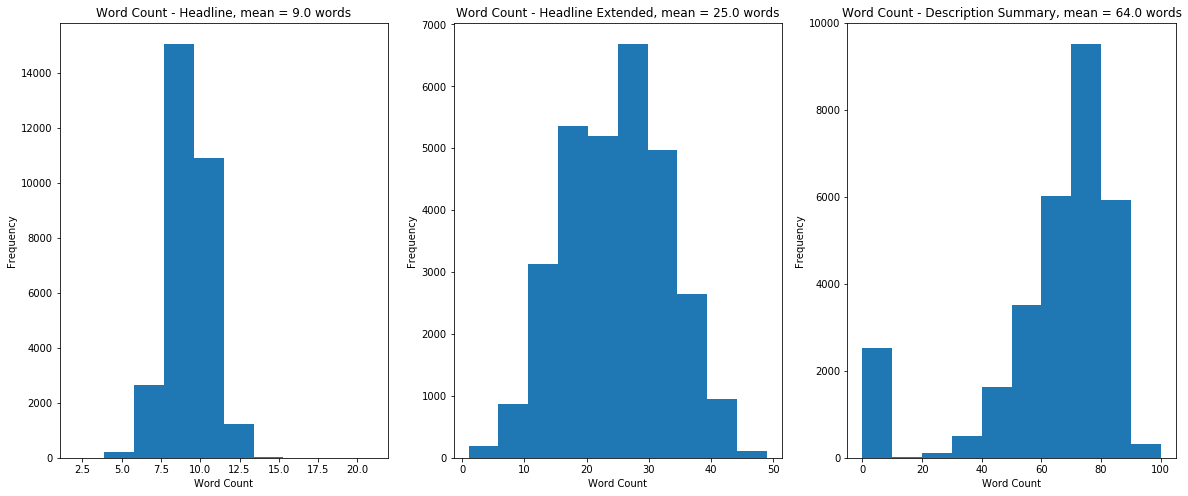

In [10]:
fig, ax = plt.subplots(1,3,figsize = (20, 8))
ax[0].hist(n_words_cnt_headline)
ax[0].set_title(f"Word Count - Headline, mean = {round(np.mean(n_words_cnt_headline))} words")
ax[0].set_xlabel("Word Count")
ax[0].set_ylabel("Frequency")

ax[1].hist(n_words_cnt_headline_ext)
ax[1].set_title(f"Word Count - Headline Extended, mean = {round(np.mean(n_words_cnt_headline_ext))} words")
ax[1].set_xlabel("Word Count")
ax[1].set_ylabel("Frequency")

ax[2].hist(n_words_cnt_summary)
ax[2].set_title(f"Word Count - Description Summary, mean = {round(np.mean(n_words_cnt_summary))} words")
ax[2].set_xlabel("Word Count")
ax[2].set_ylabel("Frequency")

plt.savefig('images/wordcount_headline.png', bbox_inches='tight')

In [11]:
np.mean(n_words_cnt_headline), np.mean(n_words_cnt_headline_ext), np.mean(n_words_cnt_summary)

(9.178749418566017, 24.722174230845905, 63.633763040733605)

## Headlines - Get Named Entities

In [12]:
headlines = article_sum['headline'].values
article_ids = article_sum['id'].values

In [13]:
entities_list_headline = list(map(get_textacy_name_entities, headlines, article_ids))

In [14]:
len(entities_list_headline)

30098

In [15]:
entities_list_headline_df = pd.concat(entities_list_headline)

In [16]:
entities_list_headline_df.head()

,text,label,article_id
0,(California),GPE,8e481a1459d04e2f82dbbb38b6d5ecb6
0,(Sheriff),PERSON,964285bee74e430cb22441e59a968e76
0,"(Champion, Patriots)",ORG,5485474faec244b0881838c139b4ef10
1,(Steelers),PERSON,5485474faec244b0881838c139b4ef10
0,(Trump),ORG,8b7aa86208f24c51a687c2433817b59d


In [30]:
## Save to csv
# entities_list_headline_df.to_csv("../data/entities_list_headline.csv")

In [41]:
entities_list_headline_df = pd.read_csv("../data/entities_list_headline.csv")
entities_list_headline_df.head(50)

,Unnamed: 0,text,label,article_id
0,0,California,GPE,8e481a1459d04e2f82dbbb38b6d5ecb6
1,0,Sheriff,PERSON,964285bee74e430cb22441e59a968e76
2,0,Champion Patriots,ORG,5485474faec244b0881838c139b4ef10
3,1,Steelers,PERSON,5485474faec244b0881838c139b4ef10
4,0,Trump,ORG,8b7aa86208f24c51a687c2433817b59d
5,0,Tokyo Olympics,EVENT,6aff14aef2ff4a10a4f27f4ca879ad9e
6,0,American Airlines,ORG,3a29e90a364a4ce7bb294286a8647535
7,1,Rams,ORG,3a29e90a364a4ce7bb294286a8647535
8,2,Chargers,ORG,3a29e90a364a4ce7bb294286a8647535
9,0,Albanian,NORP,bbabfcdbb53b4804adaffb2933bfc207


In [42]:
entities_list_headline_df.shape

(37993, 4)

In [43]:
entities_list_headline_df = entities_list_headline_df.drop_duplicates(subset = ['text', 'article_id'])

In [44]:
entities_list_headline_df.shape

(37952, 4)

## Headlines Extended - Get Named Entities

In [17]:
headlines_ext = article_sum['headline_extended'].values
article_ids = article_sum['id'].values

In [19]:
len(article_ids)

30098

In [45]:
entities_list_headline_ext = list(map(get_textacy_name_entities, headlines_ext, article_ids))

In [ ]:
len(entities_list_headline_ext)

In [ ]:
entities_list_headline_ext_df = pd.concat(entities_list_headline_ext)

In [ ]:
entities_list_headline_ext_df.head()

In [38]:
## Save to csv
# entities_list_headline_ext_df.to_csv("../data/entities_list_headline_ext.csv")

In [34]:
entities_list_headline_ext_df = pd.read_csv("../data/entities_list_headline_ext.csv")

In [37]:
entities_list_headline_ext_df.dtypes

Unnamed: 0     int64
text          object
label         object
article_id    object
dtype: object

In [36]:
entities_list_headline_ext_df.head(50)

,Unnamed: 0,text,label,article_id
0,0,Central California,LOC,8e481a1459d04e2f82dbbb38b6d5ecb6
1,0,New York,GPE,964285bee74e430cb22441e59a968e76
2,0,NFL,ORG,5485474faec244b0881838c139b4ef10
3,1,Super Bowl champion Patriots,EVENT,5485474faec244b0881838c139b4ef10
4,2,Pittsburgh,GPE,5485474faec244b0881838c139b4ef10
5,0,House,ORG,8b7aa86208f24c51a687c2433817b59d
6,0,Hollywood Park,FAC,3a29e90a364a4ce7bb294286a8647535
7,1,Los Angeles Rams,ORG,3a29e90a364a4ce7bb294286a8647535
8,2,Los Angeles Chargers,ORG,3a29e90a364a4ce7bb294286a8647535
9,3,American Airlines,ORG,3a29e90a364a4ce7bb294286a8647535


In [46]:
entities_list_headline_ext_df.shape

(64160, 4)

In [47]:
entities_list_headline_ext_df = entities_list_headline_ext_df.drop_duplicates(subset = ['text', 'article_id'])

In [48]:
entities_list_headline_ext_df.shape

(63426, 4)

In [50]:
np.mean(entities_list_headline_ext_df.duplicated('text')) # only 19% entities are unique 

0.8151231356226153

## Summary - Get Named Entities

In [ ]:
desc_summary = article_sum['summary'].values
article_ids = article_sum['id'].values

In [57]:
article_sum['summary'].values[1]

"A Central California school district will allow a high school newspaper to publish a profile of an 18-year-old student who works in the porn industry. The Stockton Record reports that the Lodi Unified School District won't prevent the article's publication Friday in The Bruin Voice at Bear Creek High School in Stockton."

In [58]:
get_textacy_name_entities(article_sum['summary'].values[1], '00')

,text,label,article_id
0,"(Central, California)",LOC,00
1,"(Stockton, Record)",PERSON,00
2,"(Lodi, Unified, School, District)",ORG,00
3,"(Bruin, Voice)",ORG,00
4,"(Bear, Creek, High, School)",ORG,00
5,(Stockton),GPE,00


In [ ]:
entities_list_summary = list(map(get_textacy_name_entities, desc_summary, article_ids))

In [ ]:
entities_list_summary_df = pd.concat(entities_list_summary)
entities_list_summary_df.head()

In [42]:
## Save to csv
# entities_list_summary_df.to_csv("../data/entities_list_summary.csv")

In [39]:
entities_list_summary_df = pd.read_csv("../data/entities_list_summary.csv")
entities_list_summary_df.head(50)

,Unnamed: 0,text,label,article_id
0,0,Central California,LOC,8e481a1459d04e2f82dbbb38b6d5ecb6
1,1,Stockton Record,PERSON,8e481a1459d04e2f82dbbb38b6d5ecb6
2,2,Lodi Unified School District,ORG,8e481a1459d04e2f82dbbb38b6d5ecb6
3,3,Bruin Voice,ORG,8e481a1459d04e2f82dbbb38b6d5ecb6
4,4,Bear Creek High School,ORG,8e481a1459d04e2f82dbbb38b6d5ecb6
5,5,Stockton,GPE,8e481a1459d04e2f82dbbb38b6d5ecb6
6,0,New York,GPE,964285bee74e430cb22441e59a968e76
7,1,Livingston County,GPE,964285bee74e430cb22441e59a968e76
8,2,Brian Seaver,PERSON,964285bee74e430cb22441e59a968e76
9,3,Avon,PERSON,964285bee74e430cb22441e59a968e76


In [40]:
entities_list_summary_df.duplicated(subset='text')

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12         True
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20         True
21        False
22        False
23        False
24        False
25        False
26        False
27        False
28        False
29        False
          ...  
154715     True
154716     True
154717     True
154718     True
154719     True
154720     True
154721     True
154722     True
154723     True
154724     True
154725     True
154726     True
154727     True
154728     True
154729     True
154730     True
154731     True
154732     True
154733     True
154734     True
154735     True
154736     True
154737     True
154738     True
154739     True
154740     True
154741    False
154742    False
154743     True
154744     True
Length: 154745, dtype: b

In [52]:
entities_list_summary_df[entities_list_summary_df.article_id == '0a0e0db8ae42425897b6381481663611']

,Unnamed: 0,text,label,article_id
10180,0,Turkey,GPE,0a0e0db8ae42425897b6381481663611
10181,1,Republican People's Party,ORG,0a0e0db8ae42425897b6381481663611
10182,2,Kemal Kilicdaroglu,PERSON,0a0e0db8ae42425897b6381481663611
10183,3,Ankara,GPE,0a0e0db8ae42425897b6381481663611
10184,4,Kilicdaroglu,PERSON,0a0e0db8ae42425897b6381481663611


## Full-text - Get Named Entities

In [ ]:
alldicts = []
for file in os.listdir(path_to_jsonfiles):
    full_filename = "%s/%s" % (path_to_jsonfiles, file)
    with open(full_filename,'r') as fi:
        dict = json.load(fi)
        alldicts.append(dict)

In [71]:
full_text_list_id = []
full_text_list = []
for file in tqdm(os.listdir('../data/full_text')):
    full_filename = "%s/%s" % ('../data/full_text', file)
    with open(full_filename,'r') as fi:
        data = json.load(fi)
    full_text_list_id.append(data['id'])
    full_text_list.append(data['full_text'])

100%|██████████| 30089/30089 [00:08<00:00, 3363.14it/s]


In [88]:
entities_list_fulltext = []
for text, text_id in tqdm(zip(full_text_list, full_text_list_id)):
    entities_list_fulltext.append(get_textacy_name_entities(text, text_id))

In [84]:
entities_list_fulltext_df = pd.concat(entities_list_fulltext)
entities_list_fulltext_df.head(50)

,text,label,article_id
0,(Southwestern),NORP,f7ddc0430ebb40248f55b2cea715b889
1,"(F., Set)",PERSON,f7ddc0430ebb40248f55b2cea715b889
2,(Flip),PERSON,f7ddc0430ebb40248f55b2cea715b889
3,(MayonnaiseMakes),PRODUCT,f7ddc0430ebb40248f55b2cea715b889
4,"(Black, Bean, Burgers)",ORG,f7ddc0430ebb40248f55b2cea715b889
5,"(New, Essentials, Cookbook)",WORK_OF_ART,f7ddc0430ebb40248f55b2cea715b889
6,"(Associated, Press)",ORG,f7ddc0430ebb40248f55b2cea715b889
0,(STOCKTON),GPE,8e481a1459d04e2f82dbbb38b6d5ecb6
1,(Calif.),GPE,8e481a1459d04e2f82dbbb38b6d5ecb6
2,(AP),ORG,8e481a1459d04e2f82dbbb38b6d5ecb6


In [85]:
entities_list_fulltext_df.shape

(1257015, 3)

In [87]:
# entities_list_fulltext_df.to_csv("../data/entities_list_full_text.csv")

In [89]:
entities_list_fulltext_df = pd.read_csv("../data/entities_list_full_text.csv")

In [90]:
entities_list_fulltext_df.head()

,Unnamed: 0,text,label,article_id
0,0,Southwestern,NORP,f7ddc0430ebb40248f55b2cea715b889
1,1,F. Set,PERSON,f7ddc0430ebb40248f55b2cea715b889
2,2,Flip,PERSON,f7ddc0430ebb40248f55b2cea715b889
3,3,MayonnaiseMakes,PRODUCT,f7ddc0430ebb40248f55b2cea715b889
4,4,Black Bean Burgers,ORG,f7ddc0430ebb40248f55b2cea715b889


## Plotting

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

In [45]:
entity_df = pd.read_csv("../data/spaCy_named_entity_data_dictionary.csv")
entity_df

,entity_label,entity_description
0,PERSON,"People, including fictional."
1,NORP,Nationalities or religious or political groups.
2,FAC,"Buildings, airports, highways, bridges, etc."
3,ORG,"Companies, agencies, institutions, etc."
4,GPE,"Countries, cities, states."
5,LOC,"Non-GPE locations, mountain ranges, bodies of ..."
6,PRODUCT,"Objects, vehicles, foods, etc. (Not services.)"
7,EVENT,"Named hurricanes, battles, wars, sports events..."
8,WORK_OF_ART,"Titles of books, songs, etc."
9,LAW,Named documents made into laws.


In [46]:
# sorted categories
entities_list_headline_df.label.value_counts().index.values

array(['GPE', 'ORG', 'PERSON', 'NORP', 'LOC', 'WORK_OF_ART', 'FAC',
       'EVENT', 'PRODUCT', 'LAW', 'LANGUAGE'], dtype=object)

In [47]:
current_palette = sns.color_palette()

In [48]:
current_palette[0]

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

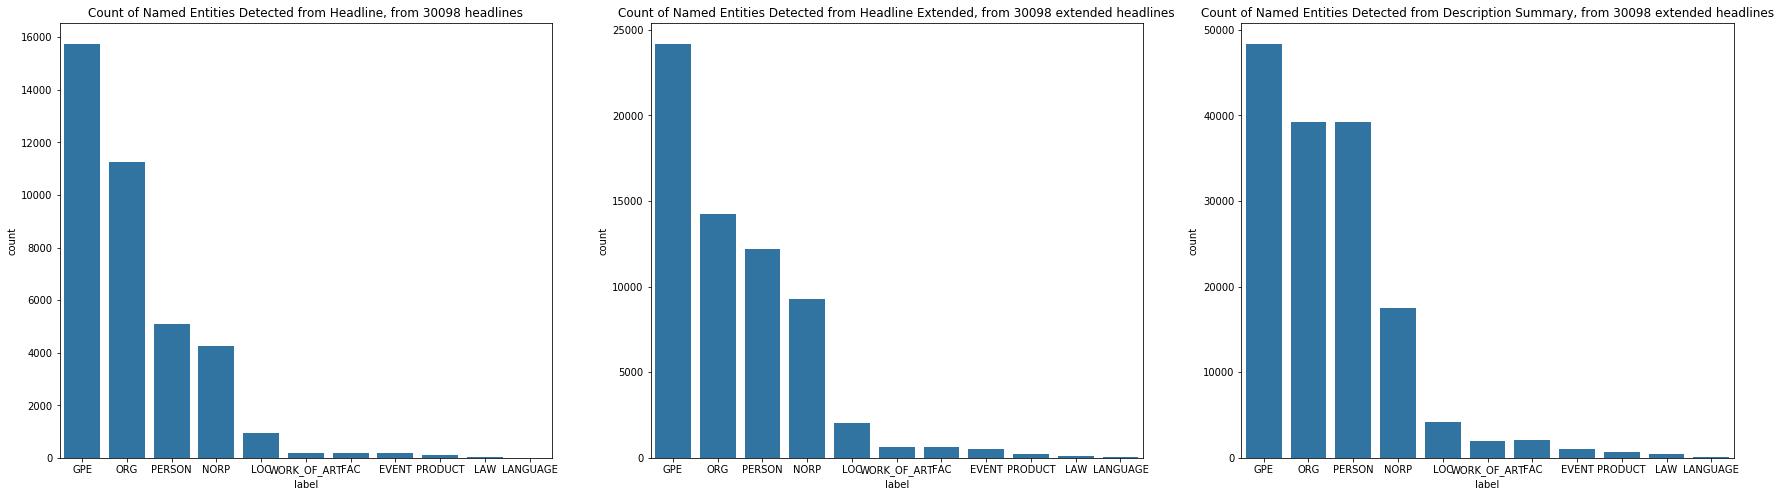

In [58]:
current_palette = sns.color_palette()

fig, ax = plt.subplots(1,3,figsize = (30,8))
sns.countplot(x="label", data=entities_list_headline_df, \
              order = entities_list_headline_df.label.value_counts().index.values, \
              color=current_palette[0],
             ax = ax[0])
ax[0].set_title(f"Count of Named Entities Detected from Headline, from {len(headlines)} headlines")

sns.countplot(x="label", data=entities_list_headline_ext_df, \
              order = entities_list_headline_df.label.value_counts().index.values, \
              color=current_palette[0],
             ax = ax[1])
ax[1].set_title(f"Count of Named Entities Detected from Headline Extended, from {len(headlines_ext)} extended headlines")

sns.countplot(x="label", data=entities_list_summary_df, \
              order = entities_list_headline_df.label.value_counts().index.values, \
              color=current_palette[0],
             ax = ax[2])
ax[2].set_title(f"Count of Named Entities Detected from Description Summary, from {len(desc_summary)} extended headlines")



plt.savefig('images/entities_headline_combined.png', bbox_inches='tight')